In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


<ipython-input-1-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
!pip install statsmodels 

In [4]:
import pandas as pd
df=pd.read_csv(r"F:\sem 7\project\Capstone-project-2\AAPL.csv", sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,27.847500,30.000000,26.157499,29.290001,26.518263,5221053600
1,2015-02-01,29.512501,33.400002,29.020000,32.115002,29.075924,4546140800
2,2015-03-01,32.312500,32.570000,30.407499,31.107500,28.274921,4554568400
3,2015-04-01,31.205000,33.634998,30.775000,31.287500,28.438524,3984542000
4,2015-05-01,31.525000,33.242500,30.840000,32.570000,29.604240,3816608400
...,...,...,...,...,...,...,...
80,2021-09-01,152.830002,157.259995,141.270004,141.500000,141.293793,1797465800
81,2021-10-01,141.899994,153.169998,138.270004,149.800003,149.581696,1564866800
82,2021-11-01,148.990005,165.699997,147.479996,165.300003,165.059113,1690808300
83,2021-12-01,167.479996,182.130005,157.800003,171.139999,171.139999,1745082300


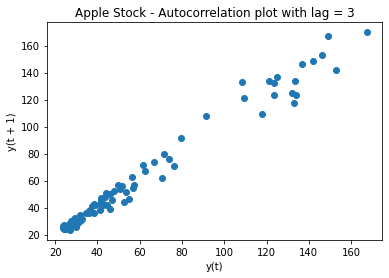

In [5]:
plt.figure()
lag_plot(df['Open'])
plt.title('Apple Stock - Autocorrelation plot with lag = 3')
plt.show()


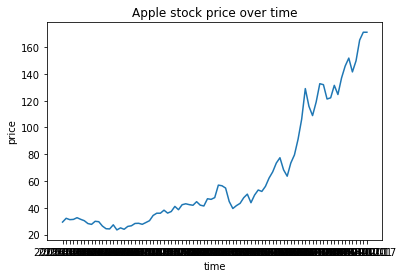

In [6]:
plt.plot(df["Date"], df["Close"])
#plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("Apple stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [7]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    fc,se,conf = model_fit.forecast()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(int(yhat))
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 97.34700626731917


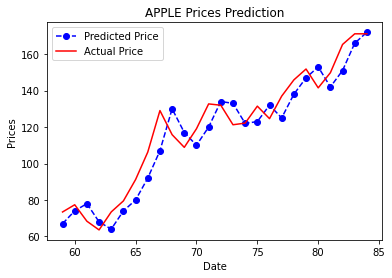

In [8]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [9]:
print(output)

(array([172.84903512]), array([6.0328747]), array([[161.02481799, 184.67325225]]))


In [10]:
print(model_predictions)

[67, 74, 78, 68, 64, 74, 80, 92, 107, 130, 117, 110, 120, 134, 133, 122, 123, 132, 125, 138, 147, 153, 142, 151, 166, 172]


In [11]:
import pickle

In [12]:
with open("model_apple", 'wb') as f:
    pickle.dump(model,f)

In [15]:
with open('model_apple', 'rb') as f:
    mp = pickle.load(f)

Pytesting

In [29]:
#last value of out dataset
actual_value=df['Close'].iloc[-1]
actual_value

171.139999

In [69]:
#chcecking our prediction
import pytest
start= actual_value - 5
end = actual_value + 5

def check():
  predict_value = model_predictions[-1]
  return (predict_value)

def test_pridict():
  assert (check() >= start and check() <= end)

print(test_pridict())

None


Acuuracy is **93 percent**